<a href="https://colab.research.google.com/github/JairoRotava/lindolfo/blob/master/Teste%20colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import subprocess
import os
# Carrega bibliotecas
import pandas as pd
from datetime import datetime, timedelta
import re
import logging
import matplotlib. pyplot as plt 

# Informacao para logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# Verifica se esta no colab e instala esses negocios
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    logger.info('Ambiente Colab detectado. Instalando dependencias')
    # Instala yfiance
    subprocess.run('pip install yfinance', shell=True)
    # # Clona meu repositorio com o codigo desenvolvido
    subprocess.run('git clone  https://github.com/JairoRotava/lindolfo.git', shell=True)
    os.chdir('./lindolfo')

import yfinance as yf
import bovespa

INFO:__main__:Ambiente Colab detectado. Instalando dependencias


In [0]:
# Coloque o nome das acoes e incial das opcoes aqui
papel_acao = 'PETR4'
papel_opcoes = ['PETRF', 'PETRE']

# Tabela com vencimento de opcoes
tabela_vencimento_opcao =  {'A':datetime(2020,1,20), 'B':datetime(2020,2,17), 'C':datetime(2020,3,16),
                        'D':datetime(2020,4,20), 'E':datetime(2020,5,18), 'F':datetime(2020,6,15),
                        'G':datetime(2020,7,20), 'H':datetime(2020,8,17), 'I':datetime(2020,9,21),
                        'J':datetime(2020,10,19), 'K':datetime(2020,11,16), 'L':datetime(2020,12,21),
                            }

In [0]:
# Dias que podem ser utilizados para filtrar opcoes
ontem = datetime.today() - timedelta(days=1)
hoje = datetime.today()

# Qual data deve ser utilizada no filtro
data_negociacao = hoje

# Pega acao e opcao do site do Caio
acao = bovespa.get_values(papel_acao)
opcao = bovespa.get_values(papel_opcoes, exact=False)

In [4]:
# Faz processamento da acao e opcao
aval_opcoes = bovespa.process(acao, opcao, tabela_vencimento_opcao, filter_date = data_negociacao)
# Coloca em ordem crescente de lucro
opcoes_ordenadas_lucro = aval_opcoes.sort_values('lucro aa', ascending=False)
# Mostra tabela das opçoes
display(opcoes_ordenadas_lucro[:10])

,acao,tipo acao,valor acao,opcao,tipo_opcao,data negociacao,valor opcao,strike,data expiracao,volume,lucro %,lucro aa
24,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE177 PETR PN 17,72",PN,07/05,0.76,17.72,18/05,5557.0,4.112676,136.466069
161,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE49 PETRE PN 17,97",PN,07/05,0.64,17.97,18/05,272.0,3.605634,119.641485
23,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE174 PETRE PN 17,47",PN,07/05,0.86,17.47,18/05,554.0,3.267606,108.425096
22,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE172 PETR PN 17,22",PN,07/05,1.07,17.22,18/05,4893.0,3.042254,100.947503
26,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE182 PETR PN 18,22",PN,07/05,0.53,18.22,18/05,7385.0,2.985915,99.078105
160,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE48 PETRE PN 16,97",PN,07/05,1.26,16.97,18/05,615.0,2.704225,89.731114
27,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE184 PETRE PN 18,47",PN,07/05,0.42,18.47,18/05,0.0,2.366197,78.514725
25,PETR4 PETROBRAS PN N2,PN,17.75,"PETRF175 PETRE PN 17,55",PN,07/05,1.56,17.55,15/06,0.0,7.661972,71.708198
159,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE47 PETRE PN 16,47",PN,07/05,1.64,16.47,18/05,210.0,2.028169,67.298335
29,PETR4 PETROBRAS PN N2,PN,17.75,"PETRE187 PETR PN 18,72",PN,07/05,0.35,18.72,18/05,0.0,1.971831,65.428937


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


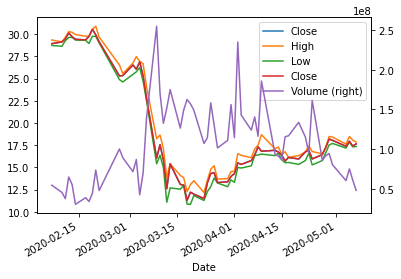

In [5]:
# Aqui usa o yahoo finance para pegar historico da acao. Utiliza versao modificada
# (no git) pois a original da pau com algumas acoes brasileiras

# O ticker precisa de + .SA para funcionar - representa bovespa
ticker = yf.Ticker( papel_acao + '.SA')
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
hist = ticker.history(period='3mo')

# Mostra grafico
ax = plt.gca()
hist.plot(y=['Close', 'High', 'Low', 'Close'], ax=ax)
hist.plot(secondary_y=True, y='Volume', ax=ax)
plt.show()